<a href="https://colab.research.google.com/github/hepuliu/DSS_Project_Backend/blob/main/DSS_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carbon Footprint and Global Warming
###DSS Project Submission - Group 1 - Anthony Perez, Hepu Liu

# Importing Libraries

In [23]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from fbprophet import Prophet
from google.colab import drive
drive.mount


<function google.colab.drive.mount>

# Importing Data & Data Cleanup

In [24]:
# Data Processing - Energy Usage
def createCSVForCountry(country_name):
    with open('/content/drive/MyDrive/DSS_Project/energy_data/energy_dataset_cleanup.csv', newline='') as csvfile:
        spamreader = csv.DictReader(csvfile)
        with open(f'/content/drive/MyDrive/DSS_Project/energy_data/Output/{country_name}.csv','w') as f:
            fieldnames = spamreader.fieldnames
            writer = csv.DictWriter(f, fieldnames=fieldnames)
            writer.writeheader()
            for row in spamreader:
                if(row['Country'] == country_name):
                    writer.writerow(row)

with open('/content/drive/MyDrive/DSS_Project/energy_data/energy_country_names.txt', encoding='utf8') as names:
    for name in names:
        createCSVForCountry(name.strip())

In [25]:
# Data Processing - Temperature
def createCSVForCountry(country_name):
    with open('/content/drive/MyDrive/DSS_Project/temperature_data/temperature_dataset_cleanup.csv', newline='') as csvfile:
        spamreader = csv.DictReader(csvfile)
        with open(f'/content/drive/MyDrive/DSS_Project/temperature_data/Output/{country_name}.csv','w') as f:
            fieldnames = spamreader.fieldnames
            writer = csv.DictWriter(f, fieldnames=fieldnames)
            writer.writeheader()
            for row in spamreader:
                if(row['Area'] == country_name):
                    writer.writerow(row)

with open('/content/drive/MyDrive/DSS_Project/temperature_data/temperature_country_names.txt', encoding='utf8') as names:
   for name in names:
        createCSVForCountry(name.strip())

# DATA PROCESSING

In [26]:
# Read and Preprocess Energy Usage DataFrame
usage_df = pd.read_csv("/content/drive/MyDrive/DSS_Project/energy_data/world_all_energy_types.csv")

def preprocess_usage_df(df):
  df.columns = df.columns.str.lower()
  df = df[['year','energy_production','co2_emission']]
  df['year']=pd.to_datetime(df['year'])
  return df

usage_df = preprocess_usage_df(usage_df)
usage_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,year,energy_production,co2_emission
0,1970-01-01 00:00:00.000001980,296.337228,4946.62713
1,1970-01-01 00:00:00.000001981,291.287773,18701.97439
2,1970-01-01 00:00:00.000001982,290.120567,18327.41397
3,1970-01-01 00:00:00.000001983,293.046647,18284.00234
4,1970-01-01 00:00:00.000001984,308.921014,18478.51221
5,1970-01-01 00:00:00.000001985,316.464262,19602.54737
6,1970-01-01 00:00:00.000001986,326.753065,20027.31284
7,1970-01-01 00:00:00.000001987,334.384506,20511.37140
8,1970-01-01 00:00:00.000001988,347.412863,21163.84056
9,1970-01-01 00:00:00.000001989,354.008124,21842.54205


In [27]:
# Read and Preprocess Temperature DataFrame

temperature_df = pd.read_csv('/content/drive/MyDrive/DSS_Project/temperature_data/Output/World.csv')
title = temperature_df.iat[0,1]

def preprocess_temperature_df(df):
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.replace('y','')
  df = df[(df['element'] == 'Temperature change') & (df['months'] == 'Meteorological year')]
  df = df.loc[:, '1961':]
  df = pd.DataFrame(data=df).T.rename_axis('year').reset_index()
  df['year'] = df['year'].astype(str).astype(int)
  df['year'] = pd.to_datetime(df['year'])
  return df

temperature_df = preprocess_temperature_df(temperature_df)
temperature_df
# df_temperature.dtypes

,year,32
0,1970-01-01 00:00:00.000001961,0.207
1,1970-01-01 00:00:00.000001962,0.034
2,1970-01-01 00:00:00.000001963,0.159
3,1970-01-01 00:00:00.000001964,-0.253
4,1970-01-01 00:00:00.000001965,-0.226
5,1970-01-01 00:00:00.000001966,0.201
6,1970-01-01 00:00:00.000001967,-0.114
7,1970-01-01 00:00:00.000001968,-0.120
8,1970-01-01 00:00:00.000001969,-0.090
9,1970-01-01 00:00:00.000001970,0.153


# Energy Production Prediction

In [28]:
# Predict Energy Production

# Setup Data Frame for Energy Production Prediction

def preprocess_energy_df(df):
  df = df[['year','energy_production']]
  df.columns = ['ds','y']
  df['ds'] = df['ds'].astype(int)
  return df

energy_df = preprocess_energy_df(usage_df)

# Single Variant Prediction Model
def single_var_predictor(df):
  predictor = Prophet(interval_width=0.95)
  predictor.fit(df)
  return predictor

# Make Prediction Dataframe
def prediction_df(predictor,df):
  prediction_df = predictor.predict(df).loc[:,['ds','yhat']]
  prediction_df['ds'] = prediction_df['ds'].apply(lambda x:x.year)
  return prediction_df

# Extend Future DataFrame
def future_df(df):
  future_df = pd.DataFrame(np.arange(2020, 2100), columns=['ds'])
  return future_df

# Make Current + Prediction Dataframe
def current_results_df(df,predicted_df):
  results_df = df.merge(predicted_df, on='ds', how='left')
  return results_df

# Make Current + Future_Prediction Dataframe for Single Var Predictor
def future_results_df(df,predicted_df):
  future_results_df = pd.concat([df,predicted_df], axis=0)
  future_results_df.reset_index(drop=True, inplace=True)
  return future_results_df

# Make Current + Future_Prediction Dataframe for Multi Var Predictor
def future_results_df_multi(df,predicted_df):
  future_results_df = pd.concat([df,predicted_df[40:]], axis=0, ignore_index=True)
  return future_results_df

# Forecast for Energy Consumption
energy_predictor = single_var_predictor(energy_df)
energy_future_df = future_df(energy_df)
energy_current_predicted_df = prediction_df(energy_predictor, energy_df)
energy_future_predicted_df = prediction_df(energy_predictor, energy_future_df)
energy_results_df = current_results_df(energy_df, energy_current_predicted_df)
energy_results_df = future_results_df(energy_results_df,energy_future_predicted_df)
energy_results_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y,yhat
0,1980,296.337228,288.301533
1,1981,291.287773,292.200617
2,1982,290.120567,298.310671
3,1983,293.046647,305.280531
4,1984,308.921014,313.114406
...,...,...,...
115,2095,NaN,1396.673085
116,2096,NaN,1408.658701
117,2097,NaN,1416.720901
118,2098,NaN,1426.982696


# CO2 Emission Prediction

In [29]:
# Predict CO2 Emission

# Multi Variant Prediction Model
def multi_var_predictor(df, regressor):
  predictor = Prophet(interval_width=0.95)
  predictor.add_regressor(regressor)
  predictor.fit(df)
  return predictor

# Make Emission Data Frame
def preprocess_emission_future_df(usage_df, energy_results_df):
  energy_results_df.columns = ['year', 'energy_production','energy_production_hat']
  energy_results_df = energy_results_df[['year','energy_production_hat']]
  # energy_results_df['year'] = pd.to_datetime(energy_results_df['year'])
  future_df = usage_df[['year','co2_emission']]
  future_df['year'] = future_df['year'].astype(int)
  for year in range(2020, 2100):
    # future_df = future_df.append([{'year':year, 'co2_emission': ''}])
    future_df = future_df.append([{'year':year}], ignore_index=True)

  future_df = future_df.merge(energy_results_df, on='year', how='left')
  future_df.columns = ['ds','y','energy_production_hat']
  future_df['ds'] = future_df['ds'].astype(int)
  return future_df


# Make Training Set
def training_set(df):
  training_set = df.iloc[:40, :]
  return training_set


emission_future_df = preprocess_emission_future_df(usage_df, energy_results_df)
# emission_future_df
emission_df = training_set(emission_future_df)
# emission_df

# Forecast for CO2 Emission
emission_predictor = multi_var_predictor(emission_df, 'energy_production_hat')
emission_current_predicted_df = prediction_df(emission_predictor, emission_df)
emission_future_predicted_df = prediction_df(emission_predictor, emission_future_df)
emission_results_df = current_results_df(emission_df, emission_current_predicted_df)
emission_results_df = future_results_df_multi(emission_results_df,emission_future_predicted_df)
emission_results_df
# emission_results_df.to_csv('/content/drive/MyDrive/DSS_Project/results/CO2_Emission_World_Prediction.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y,energy_production_hat,yhat
0,1980,4946.62713,288.301533,15445.793921
1,1981,18701.97439,292.200617,17157.722729
2,1982,18327.41397,298.310671,17368.608000
3,1983,18284.00234,305.280531,17377.924703
4,1984,18478.51221,313.114406,17186.387685
...,...,...,...,...
115,2095,NaN,NaN,84188.438876
116,2096,NaN,NaN,84186.122434
117,2097,NaN,NaN,86087.790237
118,2098,NaN,NaN,86487.896085


In [30]:
# Reducing Emission Percentage

def emission_reduction(df, percent_reduction):
  df.columns = ['year', 'co2_emission','energy_production_hat', 'co2_emission_hat']
  multiplier = 1 - (percent_reduction/100)
  df['co2_emission_hat'].iloc[40:] *= multiplier
  return df

emission_results_df = emission_reduction(emission_results_df,100)
# emission_results_df = emission_reduction(emission_results_df,80)
# emission_results_df = emission_reduction(emission_results_df,50)
# emission_results_df = emission_reduction(emission_results_df,20)
emission_results_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,year,co2_emission,energy_production_hat,co2_emission_hat
0,1980,4946.62713,288.301533,15445.793921
1,1981,18701.97439,292.200617,17157.722729
2,1982,18327.41397,298.310671,17368.608000
3,1983,18284.00234,305.280531,17377.924703
4,1984,18478.51221,313.114406,17186.387685
...,...,...,...,...
115,2095,NaN,NaN,0.000000
116,2096,NaN,NaN,0.000000
117,2097,NaN,NaN,0.000000
118,2098,NaN,NaN,0.000000


# Temperature Change Prediction

In [31]:
# Predict Temperature Change

# Make Emission Data Frame
def preprocess_temperature_future_df(temperature_df, emission_results_df):
  emission_results_df = emission_results_df[['year','co2_emission_hat']]
  emission_results_df['year'] = emission_results_df['year'].astype(int)
  temperature_df.columns = ['year', 'deltaT']
  future_df = temperature_df[['year', 'deltaT']]
  future_df['year'] = future_df['year'].astype(int)
  for year in range(2020, 2100):
    future_df = future_df.append([{'year':year}], ignore_index=True)
  future_df = future_df.merge(emission_results_df, on='year', how='left').iloc[19:].reset_index(drop=True)
  future_df.columns = ['ds','y','co2_emission_hat']
  future_df['ds'] = future_df['ds'].astype(int)
  return future_df


temperature_future_df = preprocess_temperature_future_df(temperature_df, emission_results_df)
# temperature_future_df
temperature_df = training_set(temperature_future_df)
# temperature_df

# Forecast for Temperature Change
temperature_predictor = multi_var_predictor(temperature_df, 'co2_emission_hat')
temperature_current_predicted_df = prediction_df(temperature_predictor, temperature_df)
temperature_future_predicted_df = prediction_df(temperature_predictor, temperature_future_df)
temperature_results_df = current_results_df(temperature_df, temperature_current_predicted_df)
temperature_results_df = future_results_df_multi(temperature_results_df,temperature_future_predicted_df)
# temperature_results_df.to_csv('/content/drive/MyDrive/DSS_Project/results/deltaT_Prediction_100_CO2_reduction.csv')
temperature_results_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  if __name__ == '__main__':
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,y,co2_emission_hat,yhat
0,1980,0.330,15445.793921,0.139080
1,1981,0.439,17157.722729,0.147944
2,1982,0.078,17368.608000,0.210253
3,1983,0.452,17377.924703,0.249960
4,1984,0.120,17186.387685,0.267055
...,...,...,...,...
115,2095,NaN,NaN,3.100772
116,2096,NaN,NaN,3.119990
117,2097,NaN,NaN,3.109888
118,2098,NaN,NaN,3.169860


# PLOT

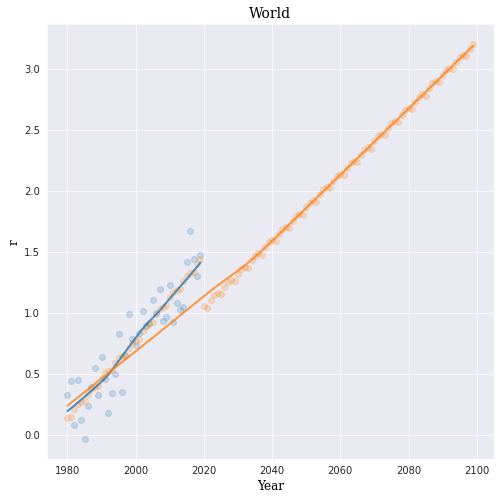

In [32]:
# Plot Prediction

def plot_prediction(df):
  label_font = {'family':'serif', 'color':'black', 'size':'12'}
  title_font = {'family':'serif', 'color':'black', 'size':'14'}
  sns.set_style('darkgrid')
  fig = plt.figure(figsize=(8,8))
  sns.regplot(data=df, x='ds', y='y', fit_reg=True, lowess=True, scatter_kws={'alpha': 0.2}, line_kws={'lw': 2, 'alpha': 0.78})
  sns.regplot(data=df, x='ds', y='yhat', fit_reg=True, lowess=True, scatter_kws={'alpha': 0.2}, line_kws={'lw': 2, 'alpha': 0.78})
  plt.xlabel('Year', fontdict = label_font)
  plt.ylabel('r', fontdict = label_font)
  plt.title(title, fontdict = title_font)

plot_prediction(temperature_results_df)